# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display


# Split Data

In [2]:
df = pd.read_csv('../Data/kamar-hotel-yogyakarta.csv')
df.sample(3)

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,...,Point_MUSEUM,Point_OFFICIAL_BUILDING,Point_OTHERS,Point_PLACE_OF_WORSHIP,Point_RESTAURANT,Point_SCHOOL,Point_SHOPPING_AREA,Point_STORE,Point_TERMINAL,Point_TRAIN_STATION
210,367769,4,2014,20.0,2,10,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
357,1358210,3,2014,28.0,2,5,1,1,1,0,...,0,0,0,0,0,1,1,1,0,0
417,281818,1,2018,12.0,2,5,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
# Memisahkan fitur dan label
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Alternatif
# x = df.drop('harga', axis=1)
# y = df['harga']

In [4]:
# Membagi data menjadi data train dan data test
# Berikan random_state untuk menghasilkan data yang sama setiap kali dijalankan

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

trainRatio = round(x_train.shape[0]/len(df), 2)*100
testRatio = round(x_test.shape[0]/len(df), 2)*100

print(f'Train set: {x_train.shape[0]} ({trainRatio}%)')
print(f'Test set: {x_test.shape[0]} ({testRatio}%)')


Train set: 812 (80.0%)
Test set: 203 (20.0%)


# Modelling

In [5]:
# inisiasi model

xgReg = xgb.XGBRegressor(           # Berikut adalah parameter default dari XGBRegressor,   jika tidak diberikan parameter maka akan menggunakan parameter tersebut.
    objective='reg:squarederror',
    eval_metric='rmse',
)

svr = SVR(
    cache_size=1500,
)

rf = RandomForestRegressor()

scoring = ['neg_mean_squared_error','r2']

> Untuk penjelasan lebih lanjut tentang XGBRegressor dan SVR dapat dilihat pada dokumentasi offical XGBoost dan SVM
- **XGBRegressor**: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
- **SVR**: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [6]:
xgReg.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
print('Train evaluation')
preds = xgReg.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_train, preds), 3))
print('-'*20)

print('Test evaluation')
preds = xgReg.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_test, preds), 3))

Train evaluation
RMSE:  37,354
R2:  0.987
--------------------
Test evaluation
RMSE:  149,255
R2:  0.748


In [8]:
svr.fit(x_train, y_train)

SVR(cache_size=1500)

In [9]:
print('Train evaluation')
preds = svr.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_train, preds), 3))
print('-'*20)

print('Test evaluation')
preds = svr.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_test, preds), 3))

Train evaluation
RMSE:  351,746
R2:  -0.133
--------------------
Test evaluation
RMSE:  316,261
R2:  -0.132


In [10]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [11]:
print('Train evaluation')
preds = rf.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_train, preds), 3))
print('-'*20)

print('Test evaluation')
preds = rf.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', '{0:,.0f}'.format(rmse))
print('R2: ', round(r2_score(y_test, preds), 3))

Train evaluation
RMSE:  69,621
R2:  0.956
--------------------
Test evaluation
RMSE:  147,145
R2:  0.755


In [12]:
# Parameter yang akan diuji
xgParams = {
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'learning_rate': [0.01, 0.05, 0.1,],
    'max_depth': np.arange(3,30,10),
    'reg_alpha': np.arange(0,5,1),
    'reg_lambda': np.arange(0,5,1),
    'subsample': [0.5, 0.6, 0.7, 0.8],
}

svrParams = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [ 1000, 10000, 25000, 50000],
}

rfParams = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

In [13]:
# Array for evaluation of models
MODEL = []
TEST = []
TRAIN = []

def eval(model,testR2, testRMSE,trainR2, trainRMSE):
    MODEL.append(model)
    TEST.append({'r2': round(testR2, 2), 'rmse': testRMSE})
    TRAIN.append({'r2': round(trainR2, 2), 'rmse': trainRMSE})

In [14]:
gridXGB = HalvingGridSearchCV(
    xgReg, 
    param_grid=xgParams,
    cv=3, 
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error',
    refit=True,
    random_state=123,
)
gridXGB.fit(x_train, y_train)

n_iterations: 5
n_required_iterations: 8
n_possible_iterations: 5
min_resources_: 6
max_resources_: 812
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3600
n_resources: 6
Fitting 3 folds for each of 3600 candidates, totalling 10800 fits
----------
iter: 1
n_candidates: 1200
n_resources: 18
Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
----------
iter: 2
n_candidates: 400
n_resources: 54
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
----------
iter: 3
n_candidates: 134
n_resources: 162
Fitting 3 folds for each of 134 candidates, totalling 402 fits
----------
iter: 4
n_candidates: 45
n_resources: 486
Fitting 3 folds for each of 45 candidates, totalling 135 fits


HalvingGridSearchCV(cv=3,
                    estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='rmse',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_ra...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
                                'learning_rate': [0.01, 0.05, 0.1],
                                'max_depth': array([ 3, 13, 23]),
                                'reg_alpha': array([0, 1, 2, 3, 4]),
                                'reg_lambda': array([0, 1, 2, 3, 4]),
                                'subsample': [0.5, 0.6, 0.7, 0.8]},
                    random_state=123, scoring='neg_mean_squared_error',
                    verbose=3)

In [15]:
print('Train evaluation')
preds = gridXGB.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmseTrain = np.sqrt(mse)
r2Train = round(r2_score(y_train, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTrain))
print('R2: ', r2Train)
print('-'*20)

print('Test evaluation')
preds = gridXGB.predict(x_test)
mseTest = mean_squared_error(y_test, preds)
rmseTest = np.sqrt(mseTest)
r2Test = round(r2_score(y_test, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTest))
print('R2: ', r2Test)

eval('XGBRegressor', r2Test, rmseTest, r2Train, rmseTrain)

Train evaluation
RMSE:  57,530
R2:  0.97
--------------------
Test evaluation
RMSE:  134,406
R2:  0.8


In [16]:
gridXGB.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 23,
 'reg_alpha': 4,
 'reg_lambda': 1,
 'subsample': 0.5}

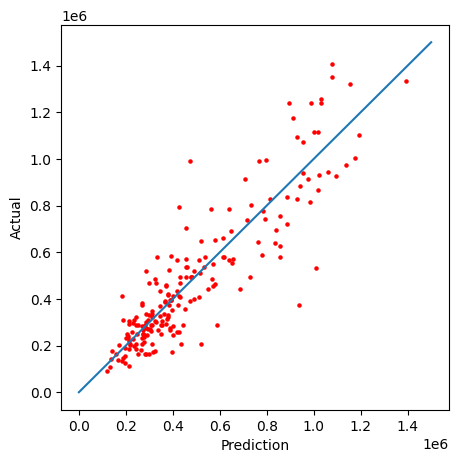

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(preds, y_test, color='r', s=5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot([0, 15e5], [0, 15e5])
plt.savefig('../Picture/XGBprediction.png', bbox_inches='tight', dpi=400)
plt.show()

In [18]:
gridRF = HalvingGridSearchCV(
    rf,
    param_grid=rfParams,
    cv=3, 
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error',
    refit=True,
    random_state=123
)
gridRF.fit(x_train, y_train)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 6
max_resources_: 812
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 675
n_resources: 6
Fitting 3 folds for each of 675 candidates, totalling 2025 fits
----------
iter: 1
n_candidates: 225
n_resources: 18
Fitting 3 folds for each of 225 candidates, totalling 675 fits
----------
iter: 2
n_candidates: 75
n_resources: 54
Fitting 3 folds for each of 75 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 25
n_resources: 162
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 9
n_resources: 486
Fitting 3 folds for each of 9 candidates, totalling 27 fits


HalvingGridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                    param_grid={'max_depth': [None, 5, 10, 15, 20],
                                'max_features': ['sqrt', 'log2', None],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5, 10],
                                'n_estimators': [100, 200, 300, 400, 500]},
                    random_state=123, scoring='neg_mean_squared_error',
                    verbose=3)

In [19]:
print('Train evaluation')
preds = gridRF.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmseTrain = np.sqrt(mse)
r2Train = round(r2_score(y_train, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTrain))
print('R2: ', r2Train)
print('-'*20)

print('Test evaluation')
preds = gridRF.predict(x_test)
mseTest = mean_squared_error(y_test, preds)
rmseTest = np.sqrt(mseTest)
r2Test = round(r2_score(y_test, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTest))
print('R2: ', r2Test)

eval('RandomForest Regressor', r2Test, rmseTest, r2Train, rmseTrain)

Train evaluation
RMSE:  68,294
R2:  0.96
--------------------
Test evaluation
RMSE:  146,843
R2:  0.76


In [20]:
gridRF.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

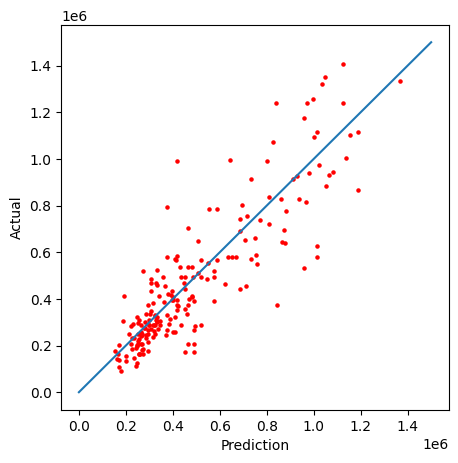

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(preds, y_test, color='r', s=5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot([0, 15e5], [0, 15e5])
plt.savefig('../Picture/RFprediction.png', bbox_inches='tight', dpi=400)
plt.show()

In [22]:
gridSVR = HalvingGridSearchCV(
    svr,
    param_grid=svrParams,
    cv=3,
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error',
    refit=True,
)
gridSVR.fit(x_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 90
max_resources_: 812
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 90
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 1
n_candidates: 6
n_resources: 270
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 810
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3, estimator=SVR(cache_size=1500), n_jobs=-1,
                    param_grid={'C': [1000, 10000, 25000, 50000],
                                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                    scoring='neg_mean_squared_error', verbose=3)

In [23]:
gridSVR.best_params_

{'C': 10000, 'kernel': 'linear'}

In [24]:
print('Train evaluation')
preds = gridSVR.predict(x_train)
mse = mean_squared_error(y_train, preds)
rmseTrain = np.sqrt(mse)
r2Train = round(r2_score(y_train, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTrain))
print('R2: ', r2Train)
print('-'*20)

print('Test evaluation')
preds = gridSVR.predict(x_test)
mseTest = mean_squared_error(y_test, preds)
rmseTest = np.sqrt(mseTest)
r2Test = round(r2_score(y_test, preds), 2)
print('RMSE: ', '{0:,.0f}'.format(rmseTest))
print('R2: ', r2Test)

eval('SVR', r2Test, rmseTest, r2Train, rmseTrain)

Train evaluation
RMSE:  165,899
R2:  0.75
--------------------
Test evaluation
RMSE:  165,886
R2:  0.69


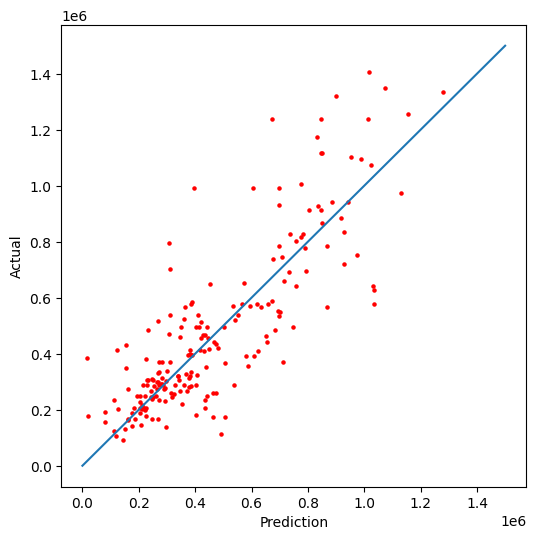

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(preds, y_test, color='r', s=5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot([0, 15e5], [0, 15e5])
plt.savefig('../Picture/SVRprediction.png', bbox_inches='tight', dpi=400)
plt.show()

# Evaluasi

## Visual

XGBRegressor prediction


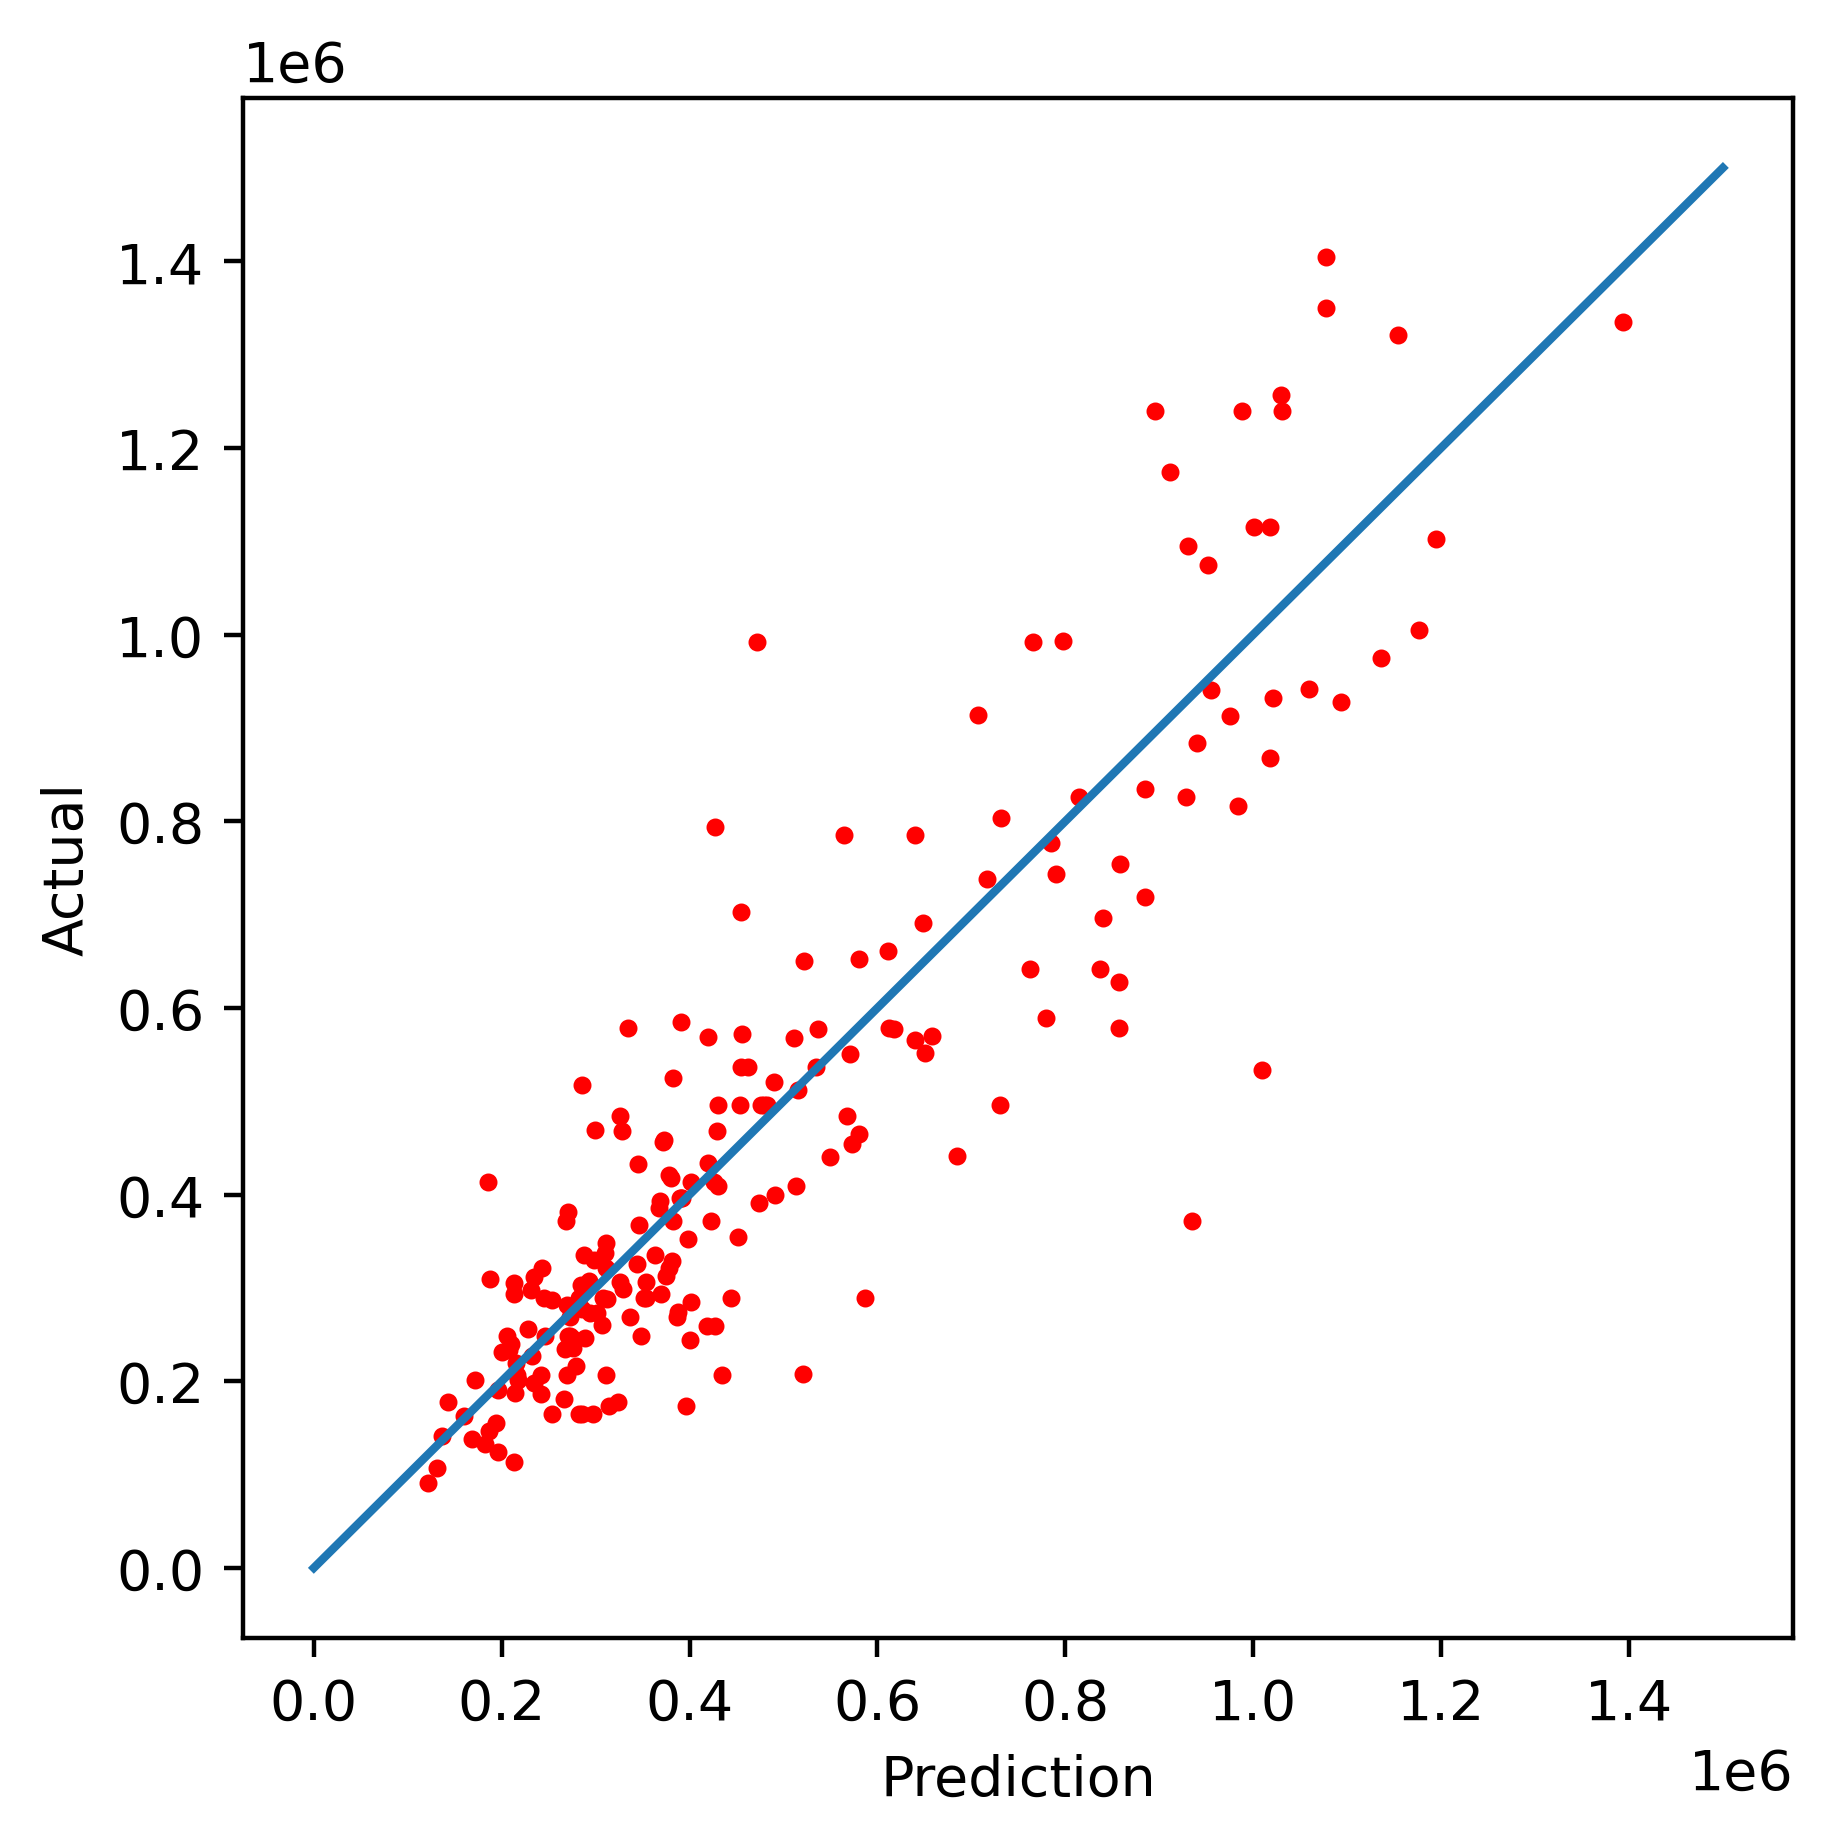

In [26]:
# Open plot from Picture folder
print('XGBRegressor prediction')
display.Image('../Picture/XGBprediction.png', width=600, height=600)

RandomForest Regressor prediction


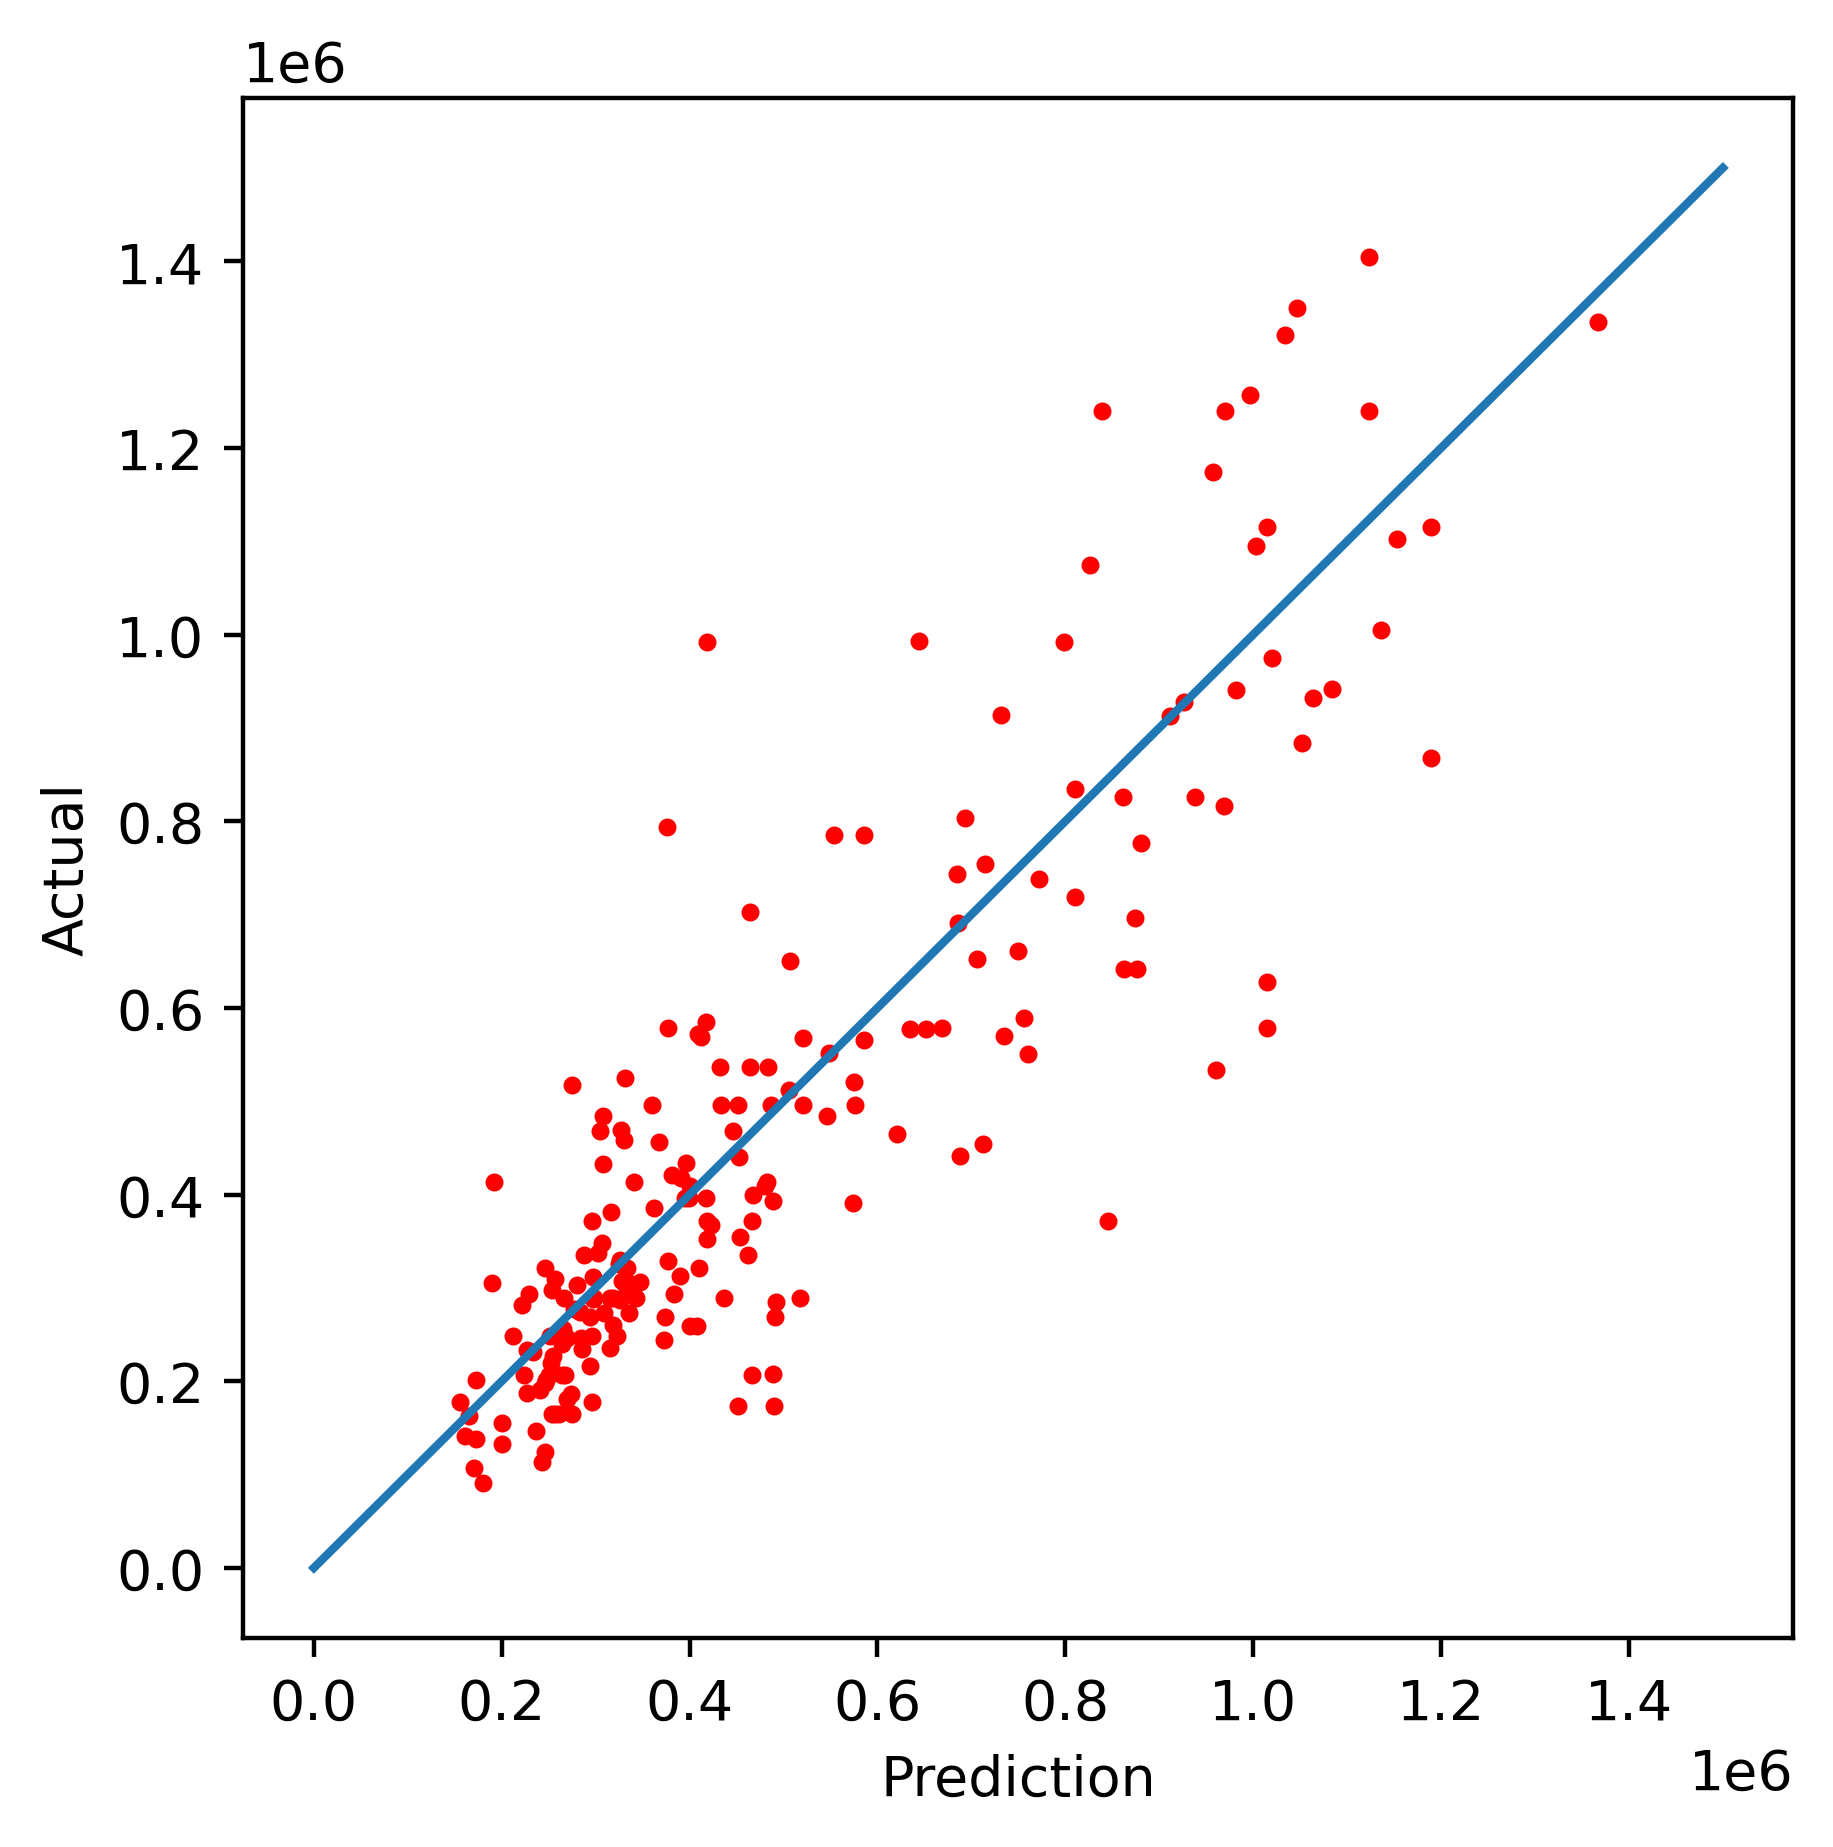

In [27]:
print('RandomForest Regressor prediction')
display.Image('../Picture/RFprediction.png', width=600, height=600)

SVR prediction


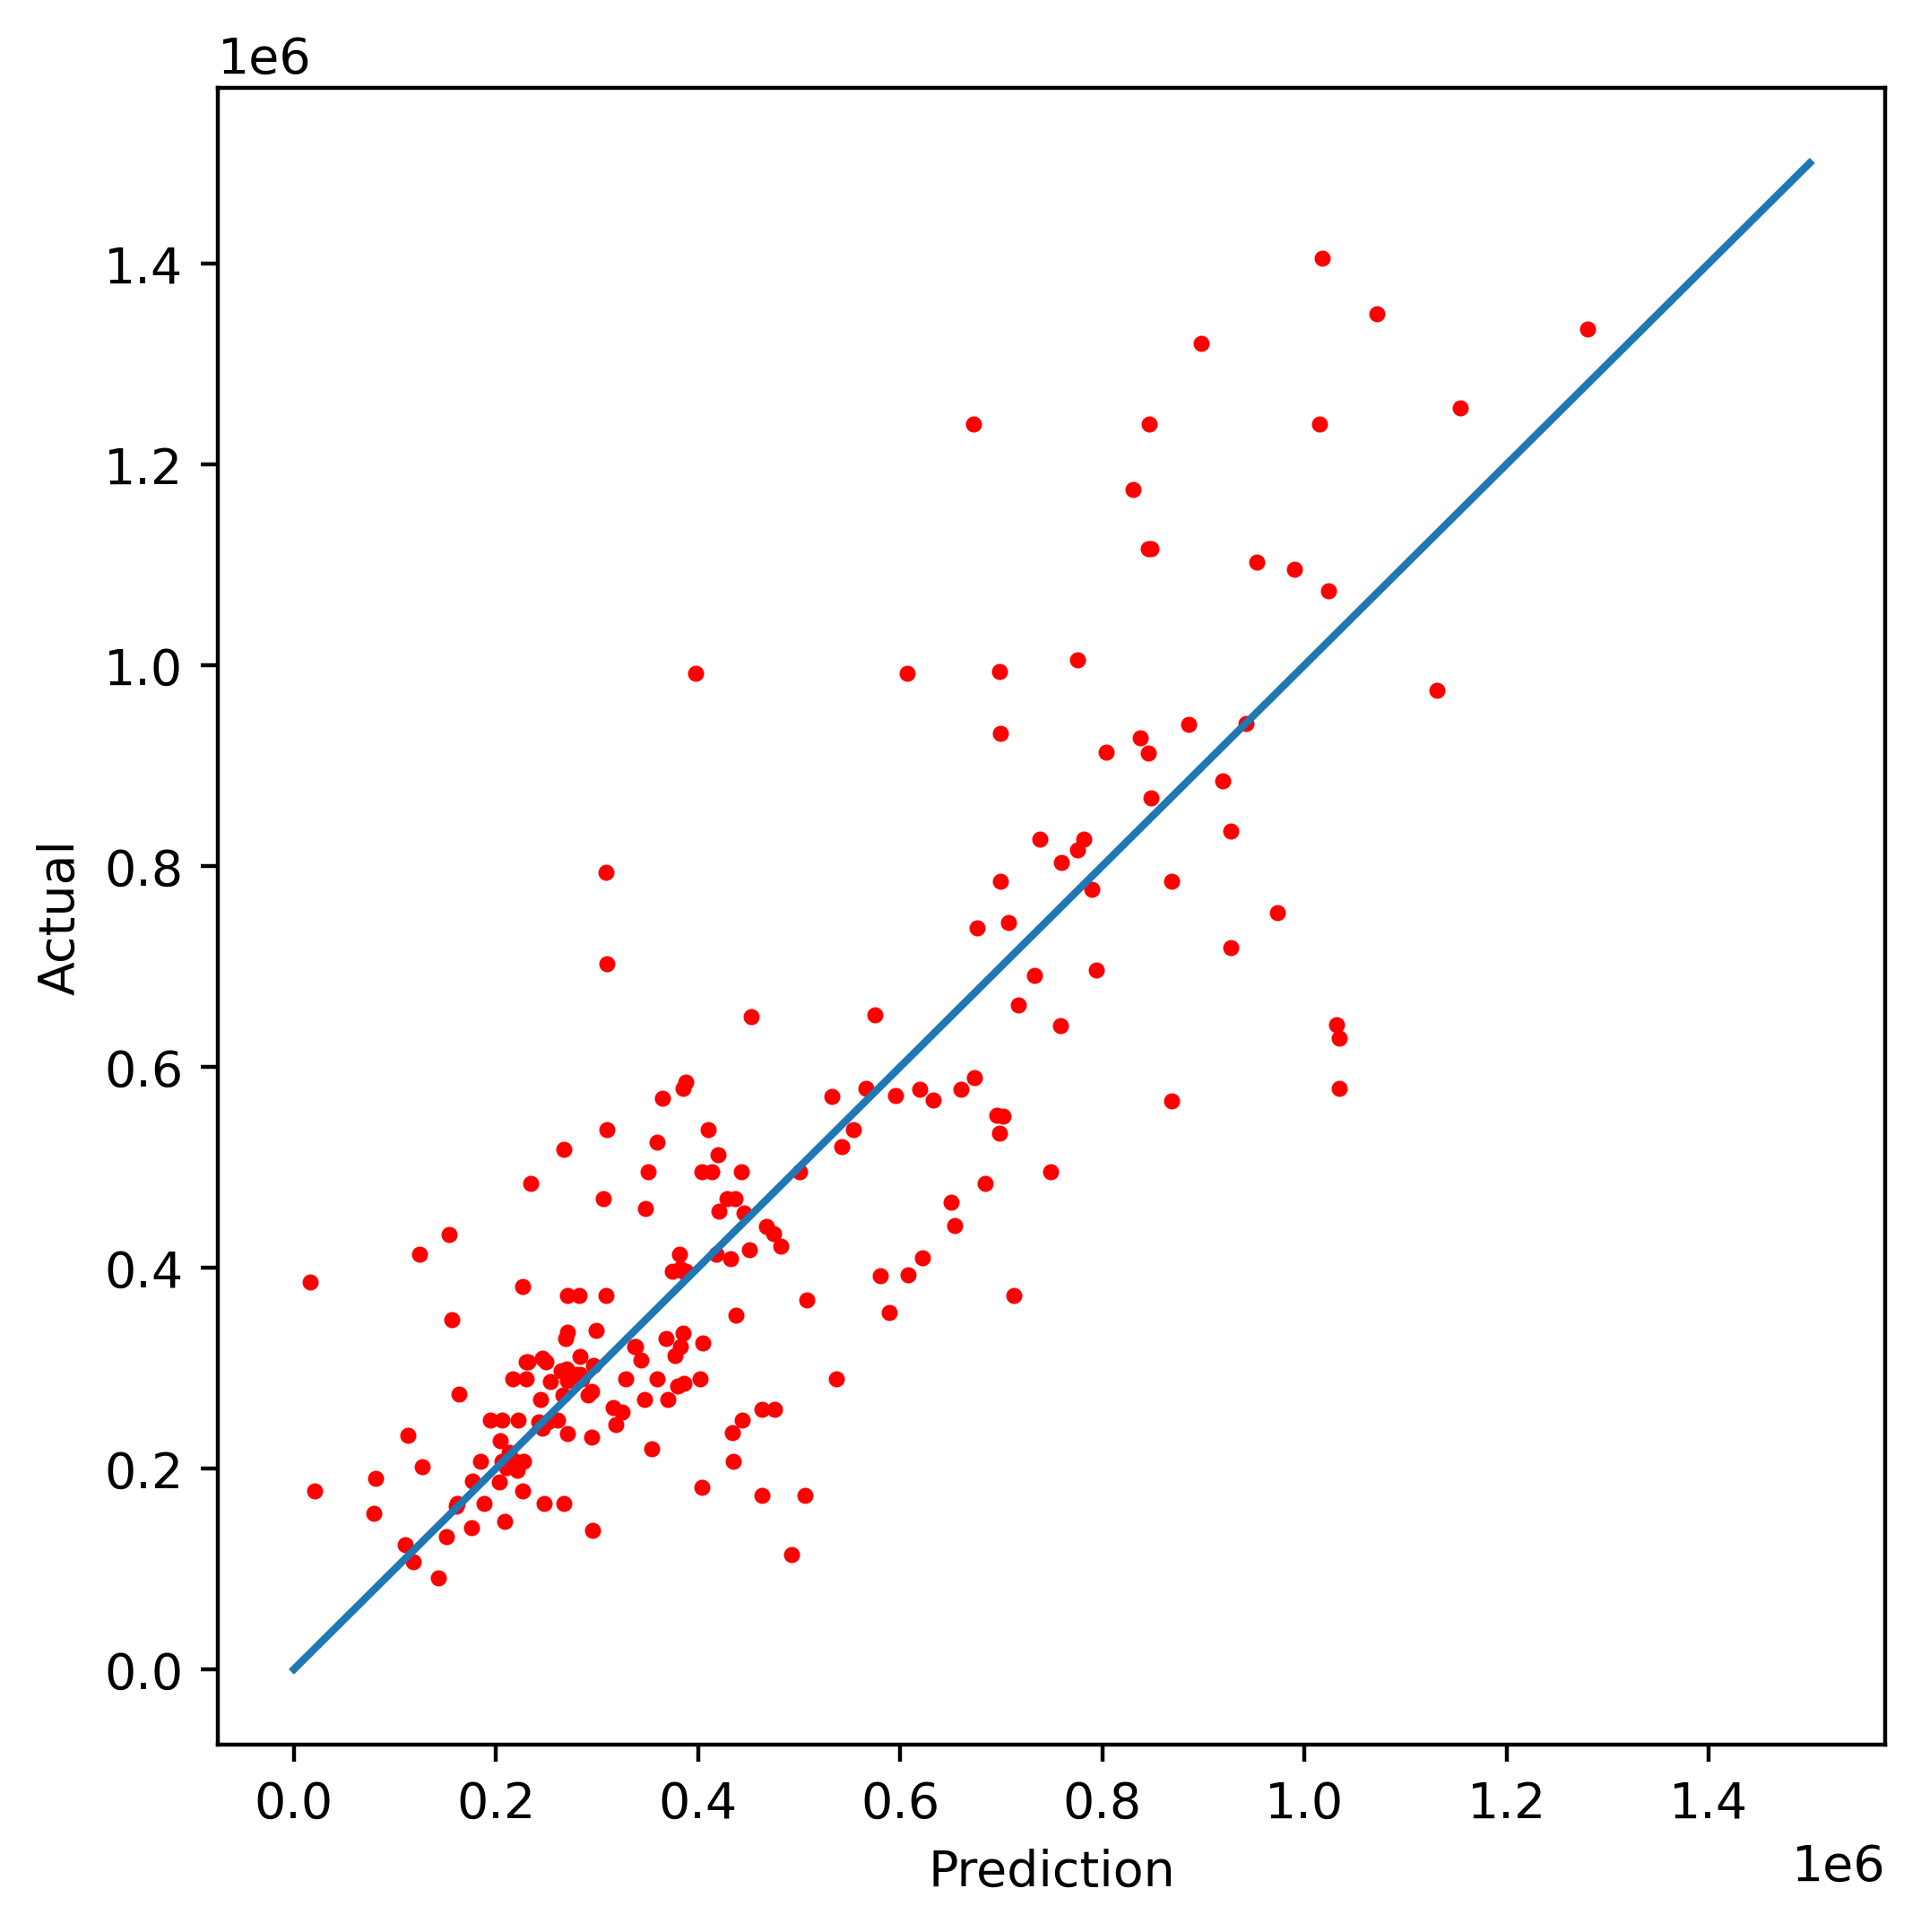

In [28]:
print('SVR prediction')
display.Image('../Picture/SVRprediction.png', width=600, height=600)

- SVR terlihat memprediksi terburuk dibandingkan dengan XGBRegressor dan Random Forest

In [31]:
# refit the model with the best parameters into bestModel
xgbModel = gridXGB.best_estimator_.fit(x_train, y_train)
svrModel = gridSVR.best_estimator_.fit(x_train, y_train)
rfModel = gridRF.best_estimator_.fit(x_train, y_train)

# export SVR Model
with open('../Model/xgbModel.pkl', 'wb') as file:
    pickle.dump(xgbModel, file)
with open('../Model/svrModel.pkl', 'wb') as file:
    pickle.dump(svrModel, file)
with open('../Model/rfModel.pkl', 'wb') as file:
    pickle.dump(rfModel, file)
    

## Statistik

In [29]:
evalData = {
    'Model': MODEL,
    'Test R2': [d['r2'] for d in TEST],
    'Test RMSE': [d['rmse'] for d in TEST],
    'Train R2': [d['r2'] for d in TRAIN],
    'Train RMSE': [d['rmse'] for d in TRAIN]
}

df_eval = pd.DataFrame(evalData)
df_eval.sort_values(by='Test RMSE', ascending=True)

,Model,Test R2,Test RMSE,Train R2,Train RMSE
0,XGBRegressor,0.80,134405.918905,0.97,57530.255551
1,RandomForest Regressor,0.76,146843.167037,0.96,68293.675682
2,SVR,0.69,165885.908731,0.75,165898.855824


- Dalam evaluasi ini, kita menggunakan **RMSE** dan **R2** sebagai metrik evaluasi.
- Dari 3 model yang telah dibuat, model yang memiliki nilai RMSE dan R2 terbaik adalah **XGBRegressor** dengan nilai RMSE sebesar **57530.255551** dan nilai R2 sebesar **0.80**.